In [1]:
import json
import pandas as pd

with open("data/rule_reward_set_10_1.0_1D_arc.json",'r') as file:
    rule_reward_orig = json.load(file)

with open("data/all_hypo_10_1.0_1D_arc.json",'r') as file:
    all_hypo_list = json.load(file)

In [2]:
pair_list = []
sharegpt_pair_list = []

for rule_reward, all_hypo in zip(rule_reward_orig,all_hypo_list):
    
    prompt = rule_reward['chosen'][0]
    score_rule_list = []
    
    for hypo in all_hypo:
        score_rule_list.append((hypo['Score'],hypo['Rule']))
        
    score_rule_list.sort(reverse=True)
    
    for score_rule_x in score_rule_list:
        
        for score_rule_y in score_rule_list:
            
            if(score_rule_x[0]>(score_rule_y[0])):

                dpo_pair = {}
                sharegpt_pair = {}
                chosen_rule = score_rule_x[1]
                chosen_score = score_rule_x[0]
                rejected_rule = score_rule_y[1]
                rejected_score = score_rule_y[0]

                dpo_pair['chosen'] = [
                    prompt,
                    {
                        "content": chosen_rule,
                        "role": "assistant"
                    }]
            
                dpo_pair['rejected'] = [
                    prompt,
                    {
                        "content": rejected_rule,
                        "role": "assistant"
                    }]
            
                dpo_pair['score_chosen'] = chosen_score
                dpo_pair['score_rejected'] = rejected_score

                sharegpt_pair["conversations"] = [
                    {
                        "from": "human",
                        "value": prompt["content"]
                    }
                ]

                sharegpt_pair["chosen"] = {
                    "from": "gpt",
                    "value": chosen_rule
                }

                sharegpt_pair["rejected"] = {
                    "from": "gpt",
                    "value": rejected_rule
                }

                pair_list.append(dpo_pair)
                sharegpt_pair_list.append(sharegpt_pair)
        

In [3]:
dfItem = pd.DataFrame.from_records(pair_list)

In [4]:
dfItem.to_csv('data/rule_reward_set_10_1.0_1D_arc.tsv', sep="\t") 

with open("data/sharegpt_all_hypo_1d_arc_10_1.0.json",'w') as file:
    json.dump(sharegpt_pair_list,file,indent=4)

In [5]:
score_chosen = dfItem['score_chosen'].tolist()
score_rejected = dfItem['score_rejected'].tolist()

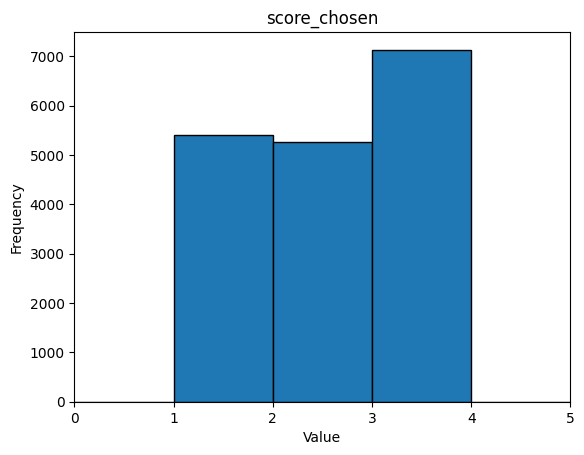

In [6]:
import matplotlib.pyplot as plt

# Create the histogram
plt.hist(score_chosen, bins=range(11), edgecolor='black')

# Set the title and labels
plt.title('score_chosen')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Set x-axis limits
plt.xlim(0, 5)

# Show the plot
plt.show()


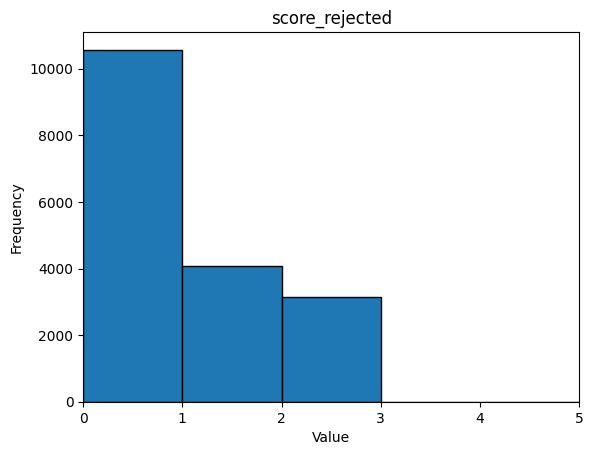

In [7]:
# Create the histogram
plt.hist(score_rejected, bins=range(11), edgecolor='black')

# Set the title and labels
plt.title('score_rejected')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Set x-axis limits
plt.xlim(0, 5)

# Show the plot
plt.show()

In [8]:
len(score_chosen),len(score_rejected)

(17798, 17798)